## Multiple Linear Regression

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

In [2]:
X, y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [3]:
df = pd.DataFrame({"col1": X[:, 0], "col2": X[:, 1], "y": y})
df.sample(5)

,col1,col2,y
53,0.561640,0.418255,20.498915
21,-0.137602,0.350884,26.980398
64,-1.559820,-0.340693,-129.721145
38,1.238743,1.718682,128.778559
30,0.137225,-0.316289,-6.136244


In [4]:
import plotly.express as px

fig = px.scatter_3d(df, x="col1", y="col2", z="y")
fig.show()

## Linear Regression

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)

In [8]:
lr.coef_

array([59.36550949, 48.54941197])

In [9]:
lr.intercept_

-1.9098121670941666

In [11]:
import numpy as np

x_surf, y_surf = np.meshgrid(
    np.linspace(df["col1"].min(), df["col1"].max(), 20),
    np.linspace(df["col2"].min(), df["col2"].max(), 20)
)
z_surf = lr.coef_[0] * x_surf + lr.coef_[1] * y_surf + lr.intercept_

import plotly.graph_objects as go

plane = go.Surface(x=x_surf, y=y_surf, z=z_surf, opacity=0.5, name="Regression Plane")
scatter = go.Scatter3d(
    x=df["col1"], y=df["col2"], z=df["y"],
    mode='markers', marker=dict(size=4), name="Data"
)

fig_plane = go.Figure(data=[scatter, plane])
fig_plane.update_layout(
    scene=dict(
        xaxis_title='col1',
        yaxis_title='col2',
        zaxis_title='y'
    ),
    title="3D Regression Plane"
)
fig_plane.show()

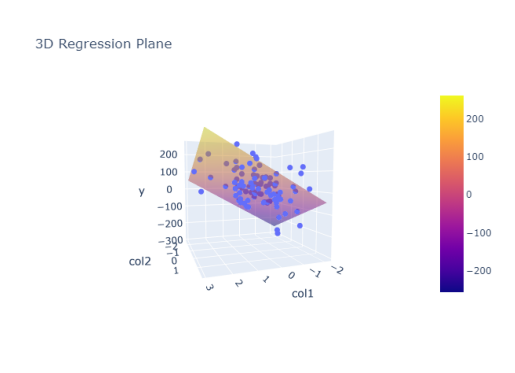

In [16]:
import matplotlib.pyplot as plt

img = plt.imread("mlr.png")
plt.imshow(img)
plt.axis('off') # optional: Hide axis better view
plt.show()